In [9]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance # importing some packages to handle images
from matplotlib import image

In [2]:
%run Initializing_Images.ipynb # initializing the data

File count for hyundai: 302
File count for lexus: 301
File count for mazda: 317
File count for mercedes: 342
File count for opel: 301
File count for skoda: 314
File count for toyota: 306
File count for volkswagen: 330
File count for hyundai: 50
File count for lexus: 50
File count for mazda: 50
File count for mercedes: 50
File count for opel: 50
File count for skoda: 50
File count for toyota: 50
File count for volkswagen: 50


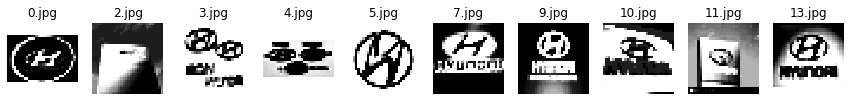

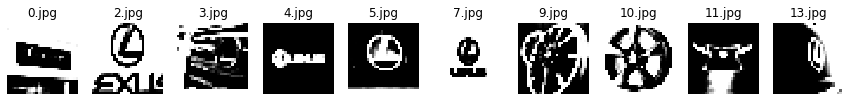

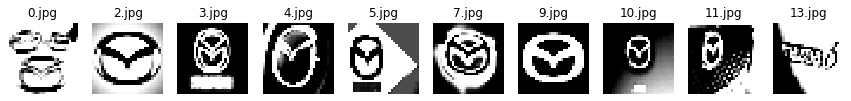

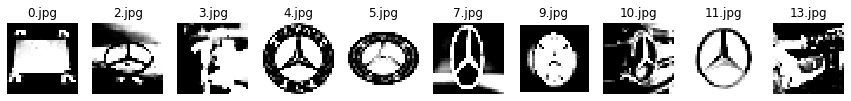

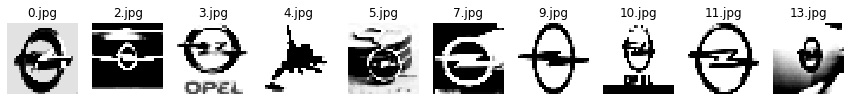

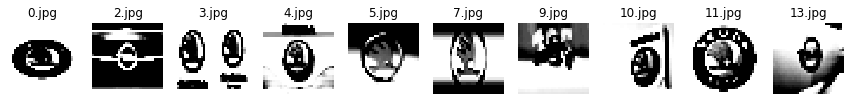

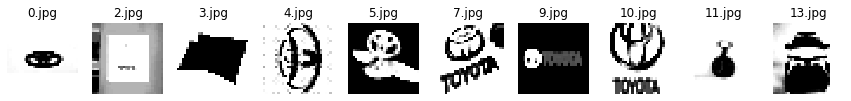

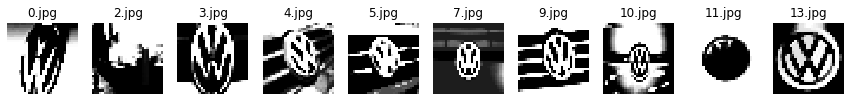

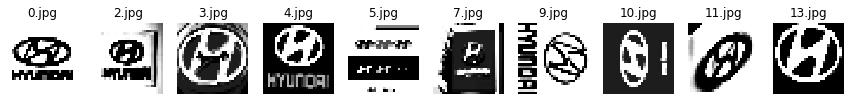

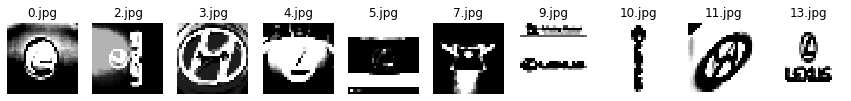

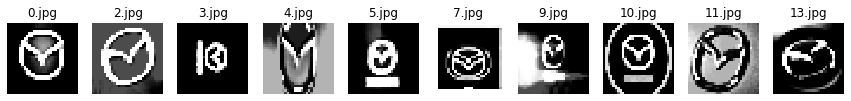

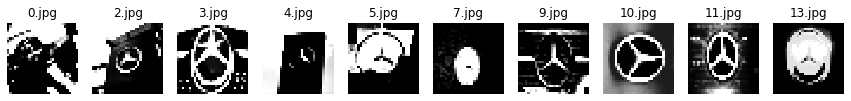

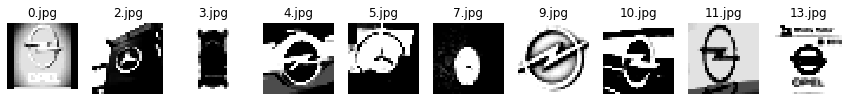

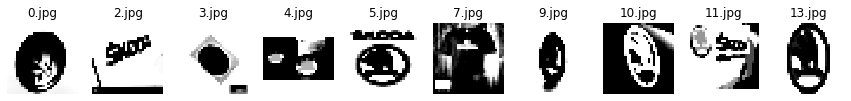

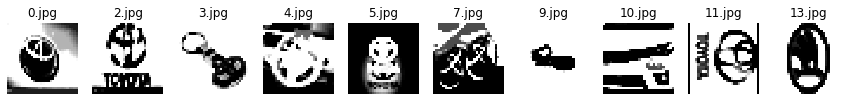

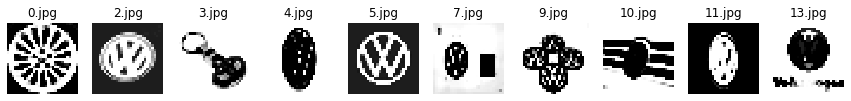

In [13]:
digit_images, digit_arrays = {}, {}
brands_dict = {}

for fold in parent_dir:
    for subfold in folders_dir:
        directory = fold + f"{subfold}\\"

        count = 0
        for path in os.listdir(directory):
            # check if current path is a file
            if os.path.isfile(os.path.join(directory, path)):
                count += 1
        print('File count for '+ subfold + ":", count)

        num_elements = [str(x) for x in range(count)]
        digit_arrays = []
        for i in num_elements: #for each i this converts the image to an 8 by 8 matrix with values from 0 to 16
            #print(i)
            path = directory + f"{i}.jpg"

            #---------elliminate unruly images--------------------------
            with np.errstate(divide='raise'):
                try:
                    digit_image = Image.open(path)
                    exif_data = digit_image._getexif()
                except:
                    print(" unable to open image:" + f"{i} (excluded)")
            #--------------------------------------------------------------

            #digit_image = Image.open(path)
            if digit_image.mode == 'RGB':
                digit_image = digit_image.resize((30,30)) # resize to 30 by 30 pixels
                digit_image = ImageEnhance.Contrast(digit_image).enhance(10).convert('LA') # preprocess (contrast & grayscale)
                digit_images[i] = digit_image
                digit_arr = np.asarray(digit_images[i])[:,:,0] # create as 3-tensor but only need 0 slice matrix
                digit_arr = (255 - digit_arr) # had opposite grayscale convention, need to correct it
                digit_arr = digit_arr/255*16 # had entries up to 255 but we only want it up to 16 
                digit_arr = np.rint(digit_arr)-3 # rounding to integer values
                digit_arr = digit_arr.clip(min = 0) # attempting to get rid of background darkness
                #digit_arrays[i] = digit_arr
                #digit_arrays[i] = digit_arr.reshape(1,-1)
                digit_arrays.append(digit_arr.reshape(1,-1))
        brands_dict[subfold] = digit_arrays
        _, axes = plt.subplots(nrows=1, ncols=10, figsize=(15, 10))
        for ax, image, label in zip(axes, digit_images.values(), digit_images.keys()):
            ax.set_axis_off()
            ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
            ax.set_title(f"{label}.jpg")